# CENSUS DISPLAY MODELLING
Realised by:EL-ALAOUI Ali & Hakem Adnane

#Data preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Census Display Modelling/new_Base_CDM_balanced_V2.csv",sep=';')

In [ ]:
data.sample(10)

,Y,X1,X2,X3,X4,X5,X6,X7
13701,Displ,1.0,4.50,8241,16,CARREFOUR MARKET,16.0,No_Feat
3700,No_Displ,7.0,28.28,13215,26,INTERMARCHE,182.0,No_Feat
13116,Displ,234.0,1866.66,220258,40,AUCHAN,9360.0,Feat
8466,No_Displ,11.0,137.50,284844,32,CARREFOUR,352.0,No_Feat
22340,Displ,1.0,15.26,57349,54,CASINO,54.0,No_Feat
5582,No_Displ,1.0,4.99,24500,24,LECLERC,24.0,No_Feat
5683,No_Displ,1.0,7.60,220258,24,AUCHAN,24.0,No_Feat
22987,Displ,97.0,775.03,220258,17,AUCHAN,1649.0,Feat
17663,Displ,1.0,13.40,135818,40,CORA,40.0,No_Feat
15586,Displ,12.0,86.28,53000,19,LECLERC,228.0,Feat


#Label Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder


ord_enc = OrdinalEncoder()
data['Y'] = ord_enc.fit_transform(data[['Y']])
print(ord_enc.categories_)
data['X5'] = ord_enc.fit_transform(data[['X5']])
print(ord_enc.categories_)
data['X7'] = ord_enc.fit_transform(data[['X7']])
print(ord_enc.categories_)
data=data.apply(lambda x: x.astype(float) )

[array(['Displ', 'No_Displ'], dtype=object)]
[array(['AUCHAN', 'CARREFOUR', 'CARREFOUR MARKET', 'CASINO', 'CORA',
       'ECOMARCHE', 'FRANPRIX', 'GEANT', 'HYPER U', 'INTERMARCHE',
       'LECLERC', 'MARCHE U', 'MATCH', 'MONOPRIX', 'OTHERS', 'PRISUNIC',
       'SHOPI', 'SIMPLY MARKET', 'SUPER U'], dtype=object)]
[array(['Feat', 'No_Feat'], dtype=object)]


In [ ]:
print(data['Y'].unique())
print(data['X5'].unique())
print(data['X7'].unique())

[1. 0.]
[ 4. 10.  0.  1.  3. 18.  7.  2.  6.  9.  5. 13. 17. 14. 12. 15.  8. 16.
 11.]
[1. 0.]


In [ ]:
data.sample(10)

,Y,X1,X2,X3,X4,X5,X6,X7
19234,0.0,5.0,59.50,21089.0,75.0,18.0,375.0,0.0
4050,1.0,5.0,31.70,40755.0,26.0,10.0,130.0,1.0
4288,1.0,5.0,35.75,21317.0,43.0,17.0,215.0,1.0
9518,1.0,1.0,2.03,9250.0,7.0,9.0,7.0,1.0
12425,1.0,1.0,13.43,22851.0,40.0,9.0,40.0,1.0
6484,1.0,1.0,11.12,37845.0,30.0,10.0,30.0,1.0
16802,0.0,2.0,22.50,59677.0,40.0,1.0,80.0,1.0
17750,0.0,22.0,550.81,136485.0,72.0,0.0,1584.0,1.0
1934,1.0,13.0,160.55,117568.0,50.0,1.0,650.0,1.0
39,1.0,3.0,27.00,22851.0,20.0,9.0,60.0,1.0


# Correlation Matrix

In [ ]:
import seaborn as sn
corrMatrix = data.corr()
corrMatrix

,Y,X1,X2,X3,X4,X5,X6,X7
Y,1.000000,-0.232654,-0.250140,0.011046,-0.232803,0.055775,-0.234277,0.504959
X1,-0.232654,1.000000,0.858353,0.266049,0.077496,-0.150772,0.882588,-0.333427
X2,-0.250140,0.858353,1.000000,0.297886,0.230587,-0.172545,0.928348,-0.340514
X3,0.011046,0.266049,0.297886,1.000000,0.127276,-0.543399,0.275925,0.033827
X4,-0.232803,0.077496,0.230587,0.127276,1.000000,-0.073387,0.288883,-0.216347
X5,0.055775,-0.150772,-0.172545,-0.543399,-0.073387,1.000000,-0.155852,-0.006554
X6,-0.234277,0.882588,0.928348,0.275925,0.288883,-0.155852,1.000000,-0.319812
X7,0.504959,-0.333427,-0.340514,0.033827,-0.216347,-0.006554,-0.319812,1.000000


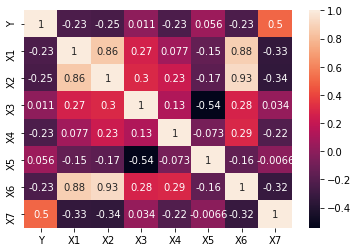

In [ ]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

(25782, 8)
      count          mean           std  ...       50%       75%        max
Y   25782.0      0.504228      0.499992  ...      1.00      1.00       1.00
X1  25782.0     13.767151     38.203406  ...      4.00     11.00    1475.00
X2  25782.0    130.888312    372.649805  ...     31.05     87.45   13589.22
X3  25782.0  64641.184431  54924.645702  ...  51522.00  91000.00  284844.00
X4  25782.0     37.646614     23.498949  ...     32.00     40.00     198.00
X5  25782.0      5.966062      5.338549  ...      4.00     10.00      18.00
X6  25782.0    587.855260   1821.338396  ...    120.00    380.00   48816.00
X7  25782.0      0.756148      0.429413  ...      1.00      1.00       1.00

[8 rows x 8 columns]


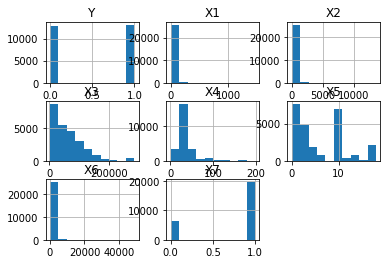

In [ ]:
# load and summarize the sonar dataset
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
print(data.shape)
# summarize each variable
print(data.describe().transpose())
# histograms of the variables
data.hist()
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fd7a7cd10>,
      dtype=object)

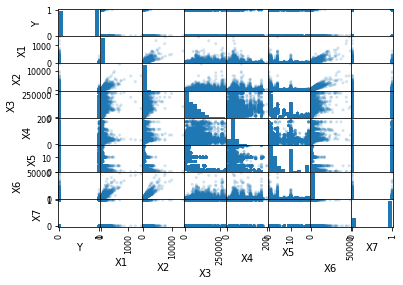

In [ ]:
scatter_matrix(data, alpha=0.2)


#Discretization based on KBinsDiscretizer algorithm

In [ ]:
columns=['X1', 'X2', 'X3','X5','X4', 'X6','X7']
data_no_dis=data.loc[:,columns]

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
trans = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform').fit(data_no_dis)
data_dis=trans.transform(data_no_dis) 

In [ ]:
data_dis=pd.DataFrame(data_dis,columns=columns)

In [ ]:
categoframe=data.loc[:,['X5', 'X7']]
concat_data=pd.concat([data_dis, categoframe], axis=1)


In [ ]:
concat_data.sample(60)

,X1,X2,X3,X4,X6,X5,X7
12769,0.0,0.0,7.0,4.0,0.0,3.0,1.0
22440,0.0,0.0,1.0,3.0,0.0,9.0,0.0
19154,0.0,0.0,2.0,3.0,0.0,3.0,1.0
8414,0.0,0.0,6.0,3.0,0.0,10.0,1.0
14343,0.0,0.0,1.0,3.0,0.0,9.0,0.0
15959,0.0,0.0,7.0,2.0,0.0,1.0,0.0
14618,0.0,0.0,4.0,2.0,0.0,1.0,0.0
2062,0.0,0.0,1.0,2.0,0.0,13.0,1.0
1275,0.0,0.0,4.0,4.0,0.0,10.0,1.0
6425,0.0,0.0,2.0,7.0,0.0,10.0,1.0


#Standrization and scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_dis)
scaled_data=scaler.transform(data_dis)
scaled_data

array([[-0.1398802 , -0.15860346, -0.24489574, ..., -0.06067341,
        -0.16381305,  0.56788462],
       [-0.1398802 , -0.15860346,  0.01425308, ..., -0.46592779,
        -0.16381305,  0.56788462],
       [-0.1398802 , -0.15860346,  0.01425308, ...,  0.74983534,
        -0.16381305,  0.56788462],
       ...,
       [-0.1398802 , -0.15860346, -1.02234221, ..., -0.06067341,
        -0.16381305,  0.56788462],
       [-0.1398802 , -0.15860346, -1.02234221, ..., -0.46592779,
        -0.16381305,  0.56788462],
       [-0.1398802 , -0.15860346, -1.02234221, ..., -0.06067341,
        -0.16381305,  0.56788462]])

#PCA(Principal Component Analysis)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7,svd_solver='full')
reducted_data=pca.fit(scaled_data)
reducted_data

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [ ]:
out_pca=pca.fit_transform(scaled_data)
print(pca.singular_values_)
print(pca.n_components_)

[274.60950103 193.32955061 169.3376883  140.38919583 107.062012
  72.92991584  50.21833118]
7


In [ ]:
out_pca

array([[-0.35306247, -0.31855323,  0.29976508, ...,  0.49589479,
         0.01089686, -0.01639287],
       [-0.56219559,  0.35698712,  0.65114722, ..., -0.5383732 ,
        -0.02558597,  0.03055105],
       [-0.04551018, -0.99745998, -0.34025164, ...,  0.84631391,
         0.11536103, -0.09036966],
       ...,
       [-0.47614159, -0.05085921,  0.29467091, ...,  1.29065023,
        -0.0098183 , -0.02989564],
       [-0.5412149 , -0.03014967,  0.59871272, ...,  1.25229518,
        -0.06174299,  0.00747414],
       [-0.47614159, -0.05085921,  0.29467091, ...,  1.29065023,
        -0.0098183 , -0.02989564]])

#Models building

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer

 # splitting Dataset into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split dataset into training set and test set --> 80% training and 20% test
label=np.array(data['Y'])
data_n=np.array(data)
X_train, X_test, y_train, y_test = train_test_split(data_no_dis,label, test_size=0.20, random_state=109)

In [ ]:
our_data.shape

(25782, 7)

# using Decision Tree Algorithem

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [ ]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

def evaluate(model,y_test,y_pred):
   cf_matrix=confusion_matrix(y_test,y_pred)
   print(cf_matrix)
   sn.heatmap(cf_matrix, annot=True, fmt='.0f', cmap='Blues')
   print(classification_report(y_test, y_pred))
   print(accuracy_score(y_test,y_pred))


[[2079  431]
 [ 581 2066]]
              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80      2510
         1.0       0.83      0.78      0.80      2647

    accuracy                           0.80      5157
   macro avg       0.80      0.80      0.80      5157
weighted avg       0.81      0.80      0.80      5157

0.8037618770603063


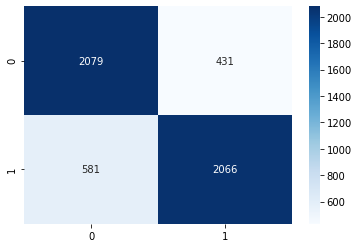

In [ ]:
evaluate(classifier,y_test,y_pred)

# Using Random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

[[2120  390]
 [ 397 2250]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      2510
         1.0       0.85      0.85      0.85      2647

    accuracy                           0.85      5157
   macro avg       0.85      0.85      0.85      5157
weighted avg       0.85      0.85      0.85      5157

0.8473918945123133


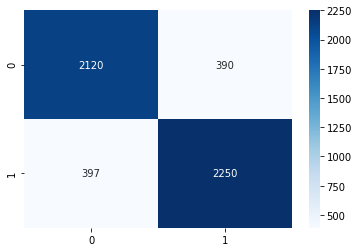

In [ ]:
evaluate(clf,y_test,y_pred)

# Using logistic regression

In [114]:
from sklearn.linear_model import LogisticRegression
clf_reg = LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred=clf.predict(X_test)

[[1502 1008]
 [ 557 2090]]
              precision    recall  f1-score   support

         0.0       0.73      0.60      0.66      2510
         1.0       0.67      0.79      0.73      2647

    accuracy                           0.70      5157
   macro avg       0.70      0.69      0.69      5157
weighted avg       0.70      0.70      0.69      5157

0.696528989722707


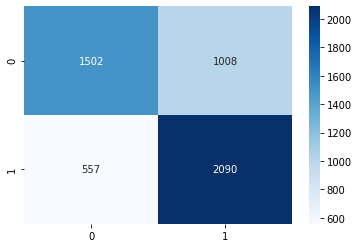

In [115]:
evaluate(clf_reg,y_test,y_pred)